<a href="https://colab.research.google.com/github/RSMZP/Behavioral-Study/blob/main/CSII%20with%20Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
path = "/Parameters.xlsx"

In [ ]:
data = pd.read_excel(path)

In [ ]:
data.columns

Index(['Submission Date', 'First Name', 'Last Name', 'Department',
       'Led By (G = Generalists (IAS)/ S= Speacialists(All other services)',
       'Civil Service you belong to', 'Genuine Concern for Others(Tf)',
       'Spends time teaching and coaching (Tf)',
       'Political Sensitivity and Skills(Tc)',
       'Decisiveness Determination and Self Confidence (Tf)',
       'Integrity, trustworthiness, honesty and openness (Tf)',
       'Networks with different offices to get the work done (Tc)',
       'Accessibility and approachibility (Tc)',
       'Encourages me to think more creatively (Tf)',
       'Gets me to rethink never questioned ideas(Tf)',
       'Tell us standards to carry out the work(Tc)',
       'Views me as having different needs, abilities, and aspirations (Tf)',
       'Monitors my performance and keeps track of mistake (Tc)',
       'Will take action before problems are chronic (Tc)',
       'Scope of Corrupt Practices (Tc)', 'Works out agreements with me (Tf)'

In [ ]:
data.shape

(324, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Submission Date                                                                 324 non-null    object
 1   First Name                                                                      324 non-null    object
 2   Last Name                                                                       324 non-null    object
 3   Department                                                                      324 non-null    object
 4   Led By (G = Generalists (IAS)/ S= Speacialists(All other services)              324 non-null    object
 5   Civil Service you belong to                                                     324 non-null    object
 6   Genuine Concern for Others

In [ ]:
df = data

In [ ]:
df['class'] = data['Led By (G = Generalists (IAS)/ S= Speacialists(All other services)']

In [ ]:
df.head()

,Submission Date,First Name,Last Name,Department,Led By (G = Generalists (IAS)/ S= Speacialists(All other services),Civil Service you belong to,Genuine Concern for Others(Tf),Spends time teaching and coaching (Tf),Political Sensitivity and Skills(Tc),Decisiveness Determination and Self Confidence (Tf),"Integrity, trustworthiness, honesty and openness (Tf)",Networks with different offices to get the work done (Tc),Accessibility and approachibility (Tc),Encourages me to think more creatively (Tf),Gets me to rethink never questioned ideas(Tf),Tell us standards to carry out the work(Tc),"Views me as having different needs, abilities, and aspirations (Tf)",Monitors my performance and keeps track of mistake (Tc),Will take action before problems are chronic (Tc),Scope of Corrupt Practices (Tc),Works out agreements with me (Tf),Any comment on if you want to be lead by a Generalist or Specialist(Optional).,class
0,2021/09/06 01:58:48,Shashank,Priya,Department of Commerce & Industry,G,IRS,Very satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Very satisfied,Very satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,NaN,G
1,2021/09/06 01:55:54,Naresh,Salecha,Department of Expenditure,G,IRAS,Satisfied,Satisfied,Very satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very satisfied,Very satisfied,Very satisfied,Unsatisfied,Neutral,NaN,G
2,2021/09/06 01:52:18,Tarun,Bajaj,Department of Revenue,S,IAS,Satisfied,Satisfied,Very satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very unsatisfied,Satisfied,NaN,S
3,2021/09/06 01:47:35,Sanjay,Sharan,Department of Textile,S,IPoS,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very satisfied,Very satisfied,Very satisfied,Satisfied,Very satisfied,Very satisfied,Unsatisfied,Neutral,NaN,S
4,2021/09/06 01:45:05,Sunila,Bagga,Department of Administrative Reforms and Publi...,G,Indian Engineering Services,Neutral,Unsatisfied,Unsatisfied,Neutral,Satisfied,Very satisfied,Neutral,Unsatisfied,Unsatisfied,Neutral,Neutral,Unsatisfied,Unsatisfied,Unsatisfied,Unsatisfied,NaN,G


In [ ]:
from collections import Counter
import numpy as np

def sum_ratings(column):
  data_g = df[df['class'] == 'G'][column]
  data_s = df[df['class'] == 'S'][column]
  freq_g = dict(Counter(data_g))
  freq_s = dict(Counter(data_s))
  freq_g_k, freq_g_v = np.array(list[freq_g.keys()]), np.array(list[freq_g.values()])
  freq_s_k, freq_s_v = np.array(list[freq_s.keys()]), np.array(list[freq_s.values()])
  rating_g = freq_s_k
  return freq_g_k, freq_s_k

In [ ]:
rep = {'Very satisfied':5, 'Satisfied':4, 'Neutral':3, 'Unsatisfied':2, 'Very unsatisfied':1}
df = df.replace(rep)

def weighted_average_m1(distribution, weights):
    numerator = sum([distribution[i]*weights[i] for i in range(len(distribution))])
    denominator = sum(weights)
    return round(numerator/denominator, 2)


def weighted_avg(column):
  data_g = df[df['class'] == 'G'][column]
  data_s = df[df['class'] == 'S'][column]
  freq_g,freq_s = dict(Counter(data_g)),dict(Counter(data_s))
  freq_g_k, freq_g_v = np.array(list(freq_g.keys())), np.array(list(freq_g.values()))
  freq_s_k, freq_s_v = np.array(list(freq_s.keys())), np.array(list(freq_s.values()))
  return weighted_average_m1(freq_g_k, freq_g_v),weighted_average_m1(freq_s_k, freq_s_v)

In [ ]:
column = 'Accessibility and approachibility (Tc)'
weighted_avg(column)

(3.28, 3.35)

In [ ]:
df

,Submission Date,First Name,Last Name,Department,Led By (G = Generalists (IAS)/ S= Speacialists(All other services),Civil Service you belong to,Genuine Concern for Others(Tf),Spends time teaching and coaching (Tf),Political Sensitivity and Skills(Tc),Decisiveness Determination and Self Confidence (Tf),"Integrity, trustworthiness, honesty and openness (Tf)",Networks with different offices to get the work done (Tc),Accessibility and approachibility (Tc),Encourages me to think more creatively (Tf),Gets me to rethink never questioned ideas(Tf),Tell us standards to carry out the work(Tc),"Views me as having different needs, abilities, and aspirations (Tf)",Monitors my performance and keeps track of mistake (Tc),Will take action before problems are chronic (Tc),Scope of Corrupt Practices (Tc),Works out agreements with me (Tf),Any comment on if you want to be lead by a Generalist or Specialist(Optional).,class
0,2021/09/06 01:58:48,Shashank,Priya,Department of Commerce & Industry,G,IRS,5,5,4,4,4,4,4,4,3,5,5,5,4,4,4,NaN,G
1,2021/09/06 01:55:54,Naresh,Salecha,Department of Expenditure,G,IRAS,4,4,5,5,4,4,4,4,4,4,5,5,5,2,3,NaN,G
2,2021/09/06 01:52:18,Tarun,Bajaj,Department of Revenue,S,IAS,4,4,5,5,4,4,4,4,4,5,5,5,5,1,4,NaN,S
3,2021/09/06 01:47:35,Sanjay,Sharan,Department of Textile,S,IPoS,4,3,4,4,4,4,4,5,5,5,4,5,5,2,3,NaN,S
4,2021/09/06 01:45:05,Sunila,Bagga,Department of Administrative Reforms and Publi...,G,Indian Engineering Services,3,2,2,3,4,5,3,2,2,3,3,2,2,2,2,NaN,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2021/08/31 08:50:10,Bal gangadhar,Singh,Security,S,Government,3,2,4,4,3,4,4,2,4,2,2,4,4,2,2,NaN,S
320,2021/08/31 08:03:04,sunil,pandey,security,S,security,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,NaN,S
321,2021/08/31 06:23:40,Chandan,Sinha,Railway protection Force,S,All india Group' A' Services,5,5,5,5,5,5,5,4,5,5,5,5,5,1,5,The above mentioned facts are enough for a goo...,S
322,2021/08/31 04:13:49,Harvinder,Singh,Indian Railways,S,Security,4,5,5,5,5,5,4,4,5,5,4,5,5,3,5,NaN,S


In [ ]:
from collections import Counter


In [ ]:
data = data.iloc[:,4:].drop("Civil Service you belong to",axis=1)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


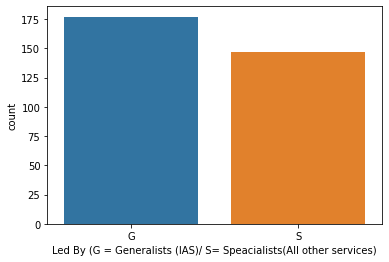

In [ ]:
sns.countplot(data["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"])

In [ ]:
Counter(data["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"])

Counter({'G': 177, 'S': 147})

In [ ]:
data["Genuine Concern for Others(Tf)"].unique()

array(['Very satisfied', 'Satisfied', 'Neutral', 'Unsatisfied',
       'Very unsatisfied'], dtype=object)

In [ ]:
rep = {'Very satisfied':5, 'Satisfied':4, 'Neutral':3, 'Unsatisfied':2,
       'Very unsatisfied':1}

In [ ]:
data_ = data.replace(rep)

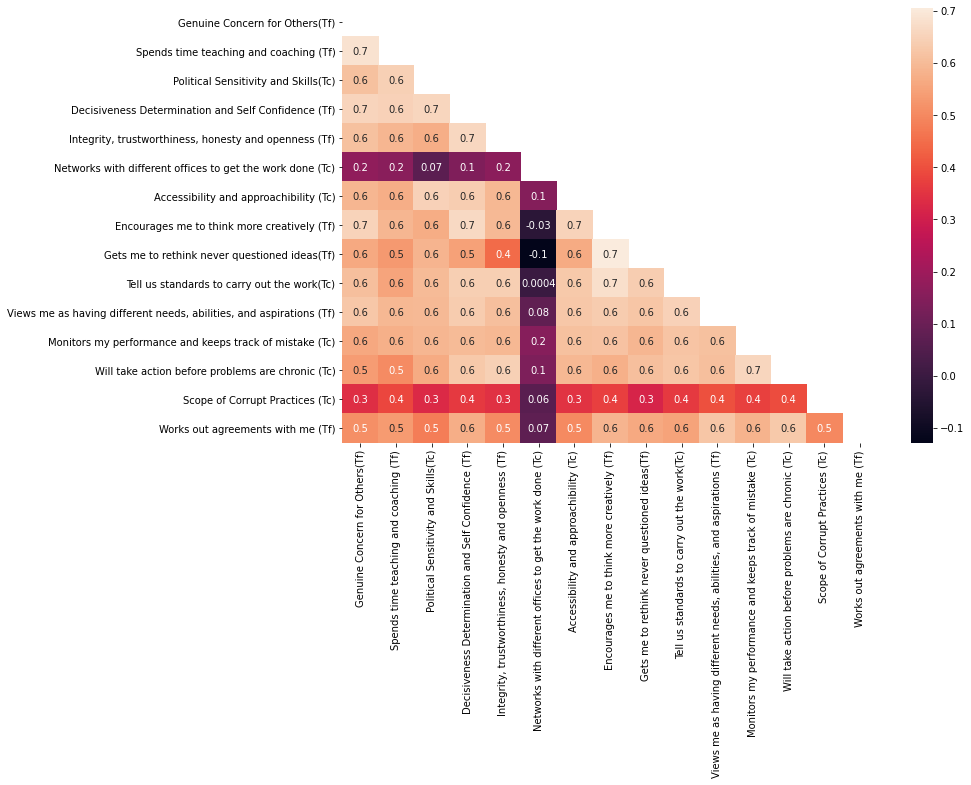

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df = data_.iloc[:,1:]
corr=df.corr(method="spearman")
plt.figure(figsize=(12,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True,mask=mask, fmt='.1g', linewidths=0, linecolor='white')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df = data_.iloc[:,1:]
corr=df.corr(method="pearson")
mask = np.zeros_like(corr)

In [ ]:
corr

,Genuine Concern for Others(Tf),Spends time teaching and coaching (Tf),Political Sensitivity and Skills(Tc),Decisiveness Determination and Self Confidence (Tf),"Integrity, trustworthiness, honesty and openness (Tf)",Networks with different offices to get the work done (Tc),Accessibility and approachibility (Tc),Encourages me to think more creatively (Tf),Gets me to rethink never questioned ideas(Tf),Tell us standards to carry out the work(Tc),"Views me as having different needs, abilities, and aspirations (Tf)",Monitors my performance and keeps track of mistake (Tc),Will take action before problems are chronic (Tc),Scope of Corrupt Practices (Tc),Works out agreements with me (Tf)
Genuine Concern for Others(Tf),1.000000,0.686144,0.613486,0.651917,0.610703,0.207899,0.581608,0.652971,0.567696,0.610164,0.612811,0.551308,0.534755,0.349268,0.487271
Spends time teaching and coaching (Tf),0.686144,1.000000,0.651937,0.644341,0.595194,0.206352,0.569038,0.581551,0.541313,0.546990,0.591247,0.576344,0.510366,0.390452,0.523075
Political Sensitivity and Skills(Tc),0.613486,0.651937,1.000000,0.661468,0.578238,0.117613,0.625507,0.570727,0.592357,0.598687,0.599848,0.581311,0.577959,0.344231,0.480128
Decisiveness Determination and Self Confidence (Tf),0.651917,0.644341,0.661468,1.000000,0.667170,0.192716,0.624899,0.659412,0.549834,0.632896,0.634970,0.581030,0.631116,0.383719,0.573903
"Integrity, trustworthiness, honesty and openness (Tf)",0.610703,0.595194,0.578238,0.667170,1.000000,0.204042,0.586570,0.591419,0.448559,0.629833,0.610291,0.578836,0.645374,0.361282,0.500188
Networks with different offices to get the work done (Tc),0.207899,0.206352,0.117613,0.192716,0.204042,1.000000,0.211379,0.039646,-0.052054,0.062142,0.158808,0.234505,0.190315,0.096595,0.165703
Accessibility and approachibility (Tc),0.581608,0.569038,0.625507,0.624899,0.586570,0.211379,1.000000,0.649914,0.563336,0.621871,0.617777,0.600824,0.595103,0.360992,0.499825
Encourages me to think more creatively (Tf),0.652971,0.581551,0.570727,0.659412,0.591419,0.039646,0.649914,1.000000,0.708368,0.670834,0.624141,0.600558,0.574283,0.391785,0.576073
Gets me to rethink never questioned ideas(Tf),0.567696,0.541313,0.592357,0.549834,0.448559,-0.052054,0.563336,0.708368,1.000000,0.643571,0.618182,0.571967,0.611750,0.339810,0.552264
Tell us standards to carry out the work(Tc),0.610164,0.546990,0.598687,0.632896,0.629833,0.062142,0.621871,0.670834,0.643571,1.000000,0.644379,0.605218,0.620241,0.377328,0.554347


In [ ]:
X = df
Y = data_.iloc[:,0]

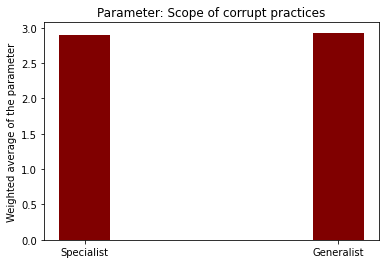

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

  
# creating the dataset
data = {'Specialist':2.90, 'Generalist':2.93}
courses = list(data.keys())
values = list(data.values())
  
#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.2)
plt.ylabel("Weighted average of the parameter")
plt.title("Parameter: Scope of corrupt practices")
plt.show()

In [ ]:
path = "C://Users/preks/Downloads/HRD.xlsx"
import pandas as pd

In [ ]:
data=pd.read_excel(path)
data["Transformational"] = ((data.iloc[:,:10]).iloc[:,2:]).mean(axis=1)
data["Transactional"]=(data.iloc[:,10:-1]).mean(axis=1)
feat_select = ["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)","Transformational","Transactional"]

In [ ]:
data_trans = data[feat_select]
data_S.mean()
data_G.mean()
data_G.std()
data_S.std()

In [ ]:
data_G.shape
data_S.shape

In [ ]:
data_trans.corr()
data_G.corr()
data_S.corr()

In [ ]:
factor=[]
for i,j in zip(data_trans["Transformational"],data_trans["Transactional"]):
  if i>j:
    factor.append("TF")
  else:
    factor.append("TC")

In [ ]:
data_trans["Role"]=factor
from collections import Counter
G = Counter(data_trans[data_trans["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="G"]["Role"])
S = Counter(data_trans[data_trans["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="S"]["Role"])
G_vals=list(dict(G).values())
print(G_vals)

In [ ]:
S_vals=list(dict(S).values())
print(S_vals)

In [ ]:
x_val = list(dict(G).keys())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

n = 2
r = np.arange(n)
x = np.array([*range(len(x_val))])
# create data
width = 0.25
plt.xticks(r + width/2,['Generalists','Speacialists'])


# plot data in grouped manner of bar type
plt.bar(x, G_vals, width,label="TF")
plt.bar(x+width, S_vals, width,label="TC")
plt.ylabel("Frequency of participants")
#plt.title("Classification of Generalists & Speacialists on the basis of Transformational (TF) & Transactional (TC)")
plt.legend()
plt.plot()

In [ ]:
import seaborn as sns
from collections import Counter
def count_class(column):
  d = dict((data.groupby(("Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"))[column].apply(len)))
  print (d)
  sns.barplot(x=list(d.keys()),y=list(d.values()))
  plt.title(f"Frequency plot of {column}")
  return d

In [ ]:
count_class('Will take action before problems are chronic (Tc)')